*  This program computes mean, variance, etc for IBM, an illustration of using Python


In [1]:
import pandas as pd                     # To load data, we use the package pandas
                                          # it is known as importing Modules, the packages we need
import numpy as np                      # To do mathematical operations, we use the package numpy
import matplotlib.pyplot as plt         # To plot the returns data, we use the package matplotlib
%matplotlib inline

# Load the monthly return of IBM, from 01/1934 to 12/2011

df = pd.read_excel('IBM.xlsx')           # note:  if cvs file, we read it by using 
                                         #         df = pd.read_cvs('IBM.cvs') 
                                        # To write a data to cvs:  data.to_cvs('newname.cvs')
        
print (df.head())                         # check the first 5 rows; note: Python index starts from 0
print (df.tail())                         # check the last 5 rows; note: Python index starts from 0
print (df.loc[0:1,"Return"])            # print the first 2 rows of Return column only. 

      ID      Date      P    Return
0  12490  19340131  147.0  0.029772
1  12490  19340228  144.0 -0.020408
2  12490  19340331  133.0 -0.065972
3  12490  19340430  143.0  0.075188
4  12490  19340531  133.5 -0.066434
        ID      Date       P    Return
931  12490  20110831  171.91 -0.050536
932  12490  20110930  174.87  0.017218
933  12490  20111031  184.63  0.055813
934  12490  20111130  188.00  0.022315
935  12490  20111230  183.88 -0.021915
0    0.029772
1   -0.020408
Name: Return, dtype: float64


In [4]:
# To calculate the mean, we can use the function np.mean

mu = np.mean(df.loc[:,"Return"])                  # .loc takes the column out as an array
print('This is the IBM mean:   {}\n' .format(mu))

# an alternative way: simpler, pandas' attribute

mu2 = df['Return'].mean() 
print('This is the IBM mean, 2nd method:   {}\n' .format(mu2))

This is the IBM mean:   0.012862142094017096

This is the IBM mean, 2nd method:   0.012862142094017096



In [5]:
# We can also use a loop to compute the mean

T = len(df)             # Get the length, # of obvs (the headers of the Excel doesn't count)

Re = df.loc[:,"Return"]

mu1 = 0         # The initial value of the mean

for i in range(T):                 # it runs from i=0 to (T-1), as Python stores data from 0
    mu1 = Re[i] + mu1                 # to sum fron i=5 to 10, use:  for i in range(5,10):  
mu1 = mu1 / T                        # it actually executes i=5, 6, 7, 8, 9, a total of 5 times

print('Sample size and the mean computed by the loop: {}   {}\n'   .format(T, mu1))

Sample size and the mean computed by the loop: 936   0.012862142094017096



In [12]:
sig = np.var(Re)         # The variance, i.e., the square of the standard deviation

std = np.sqrt(sig)       # The standard deviation

print('(Monthly) Mean,   Std  \n')
print('        {0:.4f}     {1:.4f}\n '.format(mu, std))    
                  # {0:.4f} means printing the first element up to 4 decimal point

(Monthly) Mean,   Std  

        0.0129     0.0652
 


In [13]:
#  Q1:  How many returns greater than 10% ?

LB = .10              # the lower bound

A1 = 0              # initialize the counting 

for i in range(T):             
    if  Re[i] > LB:                 
         A1 = A1 + 1
            
print('Q1: How many returns greater than 10% and its fraction ? \n')
print('          {}    {} \n' .format(A1, A1/T))   

Q1: How many returns greater than 10% and its fraction ? 

          73    0.07799145299145299 



In [14]:
# Q2:   How many returns greater than 2*std+mu?

LB2 = mu + 2 * std

A2 = 0

for i in range(T):
    if Re[i] > LB2:
        A2 = A2 + 1

print('Q2: How many returns greater than 2*std+mu and its fraction ?\n')
print('          {}       {} \n'.format(A2, A2/T))  

Q2: How many returns greater than 2*std+mu and its fraction ?

          26       0.027777777777777776 



In [15]:
# Q3: What is the accumulative returns / value of investing $1?

Value = 1

for i in range(T):
    Value = Value * (1 + Re[i])

print('Q3: What is the accumulative returns / value of investing $1?\n')
print('          {0:.2f}\n'.format(Value))   

Q3: What is the accumulative returns / value of investing $1?

          22557.17



In [16]:
# Q4: What is the accumulative return (Value of investing $1) if we miss 5% of the best returns ?
# Assuming earning the average riskfree rate of 4%/12 in those missing months                        
                        
ReturnS = sorted(Re)    # Sort the returns in increasing order

T1 = .05 * T             #  5% of the sample
T1 = round(T1)           # Round the number to an integer

Value1 = 1

for i in range(T-T1):
    Value1 = Value1 * (1 + ReturnS[i])

for i in range(T - T1 + 1, T):
    Value1 = Value1 * (1 + 0.04/12)

print('Q4: What is the accumulative return if we miss 5% of the best months? \n')
print('          {0:.2f}\n'.format(Value1))

Q4: What is the accumulative return if we miss 5% of the best months? 

          22.47



In [17]:
# Q5: What is the accumulative return if we avoid 5% of the worse months ?
# Assuming earning the average riskfree rate of 4%/12 in those missing months                        
                        
Value2 = 1

for i in range(T1):
    Value2 = Value2 * (1 + 0.04/12)

for i in range(T1+1, T):
    Value2 = Value2 * (1 + ReturnS[i])

print('Q5: What is the accumulative returns / value of investing $1 if we avoid 5% of the worse return month?\n')
print('          {0:.2f}\n'.format(Value2))

Q5: What is the accumulative returns / value of investing $1 if we avoid 5% of the worse return month?

          17270749.40



In [24]:
# Q6: What is the percentage of up days?

Up = 0
for i in range(T):
    if  Re[i] > 0: 
        Up = Up + 1

Udays = Up/T * 100

print('Q6: What is the percentage of up days?\n')
print('          {0:.2f}%\n'.format(Udays))

# another way of formating output:  using f-string 

print(f"The percentage of up days is  {Udays:4.16f}%.")  
                # print as 4 dignits before ., and 16 decimal points
                # 4 can be dropped if do not know how big the number is 

Q6: What is the percentage of up days?

          56.62%

The percentage of up days is  56.6239316239316253%.


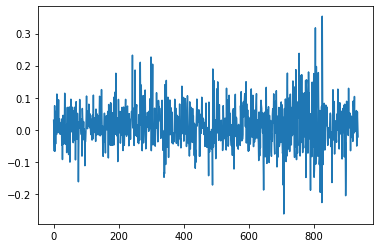

In [11]:
# Plot the returns of IBM

p = plt.plot(Re)

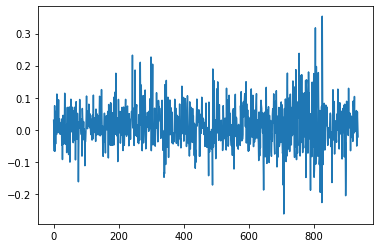

In [8]:
#
df['Return'].plot()                       # another way of ploting the data 
plt.show()                               # just make sure the plot shows on the screen 

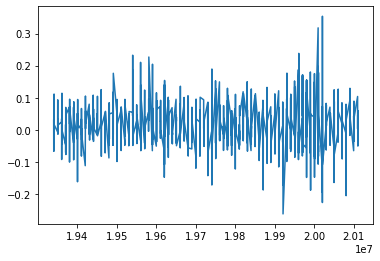

In [13]:
# Plot the returns of IBM

p = plt.plot(df['Date'],Re)       # plot date vs return

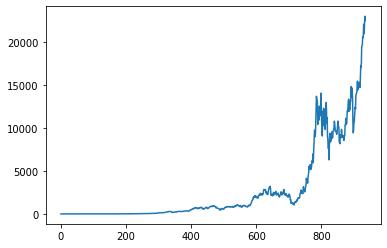

In [14]:
# Plot the accumulative returns of IBM
#  We need to store the value over time

ValueC = [0]*T        # set up the storage, a vector of T zeros

ValueC[0] = 1 + Re[0]     # The first month accu return

for i in range(T-1):
    ValueC[i+1] = ValueC[i] * (1 + Re[i+1])

s = pd.Series(ValueC)
p2 = plt.plot(s.index, s.values)